In [2]:
# https://www.imdb.com
# title, genre, content, director, stars, time
import requests
from bs4 import BeautifulSoup
url = "https://www.imdb.com/movies-coming-soon/2022-02/"
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
tags = soup.select('#main > div > div.list.detail > div> table > tbody > tr> td.overview-top')
tags[0]

<td class="overview-top">
<h4><a href="/title/tt11466222/" title="Jackass Forever (2022)"> Jackass Forever (2022)</a></h4>
<p class="cert-runtime-genre">
<img alt="Certificate R" class="absmiddle certimage" src="https://m.media-amazon.com/images/S/sash/HnfGvvr0ifGfk6P.png" title="R"/>
<time datetime="PT96M">96 min</time>
                                  -  
                                <span>Documentary</span>
<span class="ghost">|</span>
<span>Action</span>
<span class="ghost">|</span>
<span>Comedy</span>
</p>
<div class="rating_txt">
</div>
<div class="outline">
After 11 years, the Jackass crew is back for their final crusade.                    </div>
<div class="txt-block">
<h5 class="inline">Director:</h5>
<span>
<a href="/name/nm0871860/">Jeff Tremaine</a> </span>
</div>
<div class="txt-block">
<h5 class="inline">Stars:</h5>
<a href="/name/nm0424216/">Johnny Knoxville</a>, 
<a href="/name/nm0828177/">Steve-O</a>, 
<a href="/name/nm0690686/">Chris Pontius</a>, 
<a href="/name/

In [51]:
# title = tags[0].select('a')[0].text
# genre = []
# for i in range(0,len(tags[0].select('p > span')),2):
#     genre.append(tags[0].select('p > span')[i].text)
# content = tags[0].select('div.outline')[0].text
# director = tags[0].select('span > a')[0].text
# stars = []
# for i in tags[0].select('div > a'):
#     stars.append(i.text)
# time = tags[0].select('p > time')[0].text

[<time datetime="PT96M">96 min</time>]

In [59]:
movies = []
for tag in tags : 
    title = tag.select('a')[0].text
    genre = []
    for i in range(0,len(tag.select('p > span')),2):
        genre.append(tag.select('p > span')[i].text)
    content = tag.select('div.outline')[0].text
    director = tag.select('span > a')[0].text
    stars = []
    for i in tag.select('div > a'):
        stars.append(i.text)
    # time = tag.select('p > time')[0].text   # < 시간이 없는 항목이 있으니 예외처리!
    try :
        time = tag.select('p > time')[0].text
    except: pass

    # print('title :',title)
    # print('genres :',genre)
    # print('content :',content)
    # print('director :',director)
    # print('stars :',stars)
    # if time : print('time :',time)
    # print('-'*100)

    # 출력과 별게로 딕셔너리 생성
    m = {}
    m['title'] = title
    m['genres'] = genre
    m['content'] = content
    m['director'] = director
    m['stars'] = stars
    m['time'] = time
    movies.append(m)

movies

[{'title': ' Jackass Forever (2022)',
  'genres': ['Documentary', 'Action', 'Comedy'],
  'content': '\nAfter 11 years, the Jackass crew is back for their final crusade.                    ',
  'director': 'Jeff Tremaine',
  'stars': ['Johnny Knoxville', 'Steve-O', 'Chris Pontius', 'Eric André'],
  'time': '96 min'},
 {'title': ' 더 블랙 폰 (2021)',
  'genres': ['15'],
  'content': "\nAfter being abducted by a child killer and locked in a soundproof basement, a 13-year-old boy starts receiving calls on a disconnected phone from the killer's previous victims.                    ",
  'director': 'Scott Derrickson',
  'stars': ['Ethan Hawke',
   'Jeremy Davies',
   'James Ransone',
   'Madeleine McGraw'],
  'time': '102 min'},
 {'title': ' Moonfall (2022)',
  'genres': ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'],
  'content': '\nIn Moonfall, a mysterious force knocks the Moon from its orbit around Earth and sends it hurdling on a collision course with life as we know it. With mere weeks befor

In [60]:
import pandas as pd
movies_df = pd.DataFrame(movies)
movies_df

,title,genres,content,director,stars,time
0,Jackass Forever (2022),"[Documentary, Action, Comedy]","\nAfter 11 years, the Jackass crew is back for...",Jeff Tremaine,"[Johnny Knoxville, Steve-O, Chris Pontius, Eri...",96 min
1,더 블랙 폰 (2021),[15],\nAfter being abducted by a child killer and l...,Scott Derrickson,"[Ethan Hawke, Jeremy Davies, James Ransone, Ma...",102 min
2,Moonfall (2022),"[Action, Adventure, Fantasy, Sci-Fi]","\nIn Moonfall, a mysterious force knocks the M...",Roland Emmerich,"[Halle Berry, Patrick Wilson, John Bradley, Mi...",120 min
3,Death on the Nile (2022),"[Crime, Drama, Mystery]","\nWhile on vacation on the Nile, Hercule Poiro...",Kenneth Branagh,"[Kenneth Branagh, Gal Gadot, Tom Bateman, Rose...",127 min
4,Blacklight (2022),"[Action, Thriller]",\nTravis Block is a government operative comin...,Mark Williams,"[Liam Neeson, Aidan Quinn, Taylor John Smith, ...",108 min
5,Catwoman: Hunted (2022),"[Animation, Action, Sci-Fi]",\nFollows Catwoman in an attempt to steal a pr...,Shinsuke Terasawa,"[Stephanie Beatriz, Lauren Cohan, Kelly Hu, Jo...",108 min
6,Marry Me (2022),"[Comedy, Music, Romance]",\nMusic superstars Kat Valdez and Bastian are ...,Kat Coiro,"[John Bradley, Owen Wilson, Jennifer Lopez, Ut...",112 min
7,What About Love (2023),"[Drama, Romance]",\nTwo young lovers change the lives of their p...,Klaus Menzel,"[Sharon Stone, Andy Garcia, Rosabell Laurenti ...",114 min
8,The Devil's Light (2022),"[Horror, Thriller]",\nA nun prepares to perform an exorcism and co...,Daniel Stamm,"[Virginia Madsen, Nicholas Ralph, Christian Na...",93 min
9,The Amazing Maurice,"[Animation, Family]","\nThis story follows Maurice, a streetwise cat...",Toby Genkel,"[Hugh Laurie, Emilia Clarke, David Thewlis, Hi...",84 min


In [62]:
movies_df.to_csv('./python_data_files/movies.csv')
pd.read_csv('movies.csv', index_col=0)

,title,genres,content,director,stars,time
0,Jackass Forever (2022),"['Documentary', 'Action', 'Comedy']","\nAfter 11 years, the Jackass crew is back for...",Jeff Tremaine,"['Johnny Knoxville', 'Steve-O', 'Chris Pontius...",96 min
1,더 블랙 폰 (2021),['15'],\nAfter being abducted by a child killer and l...,Scott Derrickson,"['Ethan Hawke', 'Jeremy Davies', 'James Ranson...",102 min
2,Moonfall (2022),"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","\nIn Moonfall, a mysterious force knocks the M...",Roland Emmerich,"['Halle Berry', 'Patrick Wilson', 'John Bradle...",120 min
3,Death on the Nile (2022),"['Crime', 'Drama', 'Mystery']","\nWhile on vacation on the Nile, Hercule Poiro...",Kenneth Branagh,"['Kenneth Branagh', 'Gal Gadot', 'Tom Bateman'...",127 min
4,Blacklight (2022),"['Action', 'Thriller']",\nTravis Block is a government operative comin...,Mark Williams,"['Liam Neeson', 'Aidan Quinn', 'Taylor John Sm...",108 min
5,Catwoman: Hunted (2022),"['Animation', 'Action', 'Sci-Fi']",\nFollows Catwoman in an attempt to steal a pr...,Shinsuke Terasawa,"['Stephanie Beatriz', 'Lauren Cohan', 'Kelly H...",108 min
6,Marry Me (2022),"['Comedy', 'Music', 'Romance']",\nMusic superstars Kat Valdez and Bastian are ...,Kat Coiro,"['John Bradley', 'Owen Wilson', 'Jennifer Lope...",112 min
7,What About Love (2023),"['Drama', 'Romance']",\nTwo young lovers change the lives of their p...,Klaus Menzel,"['Sharon Stone', 'Andy Garcia', 'Rosabell Laur...",114 min
8,The Devil's Light (2022),"['Horror', 'Thriller']",\nA nun prepares to perform an exorcism and co...,Daniel Stamm,"['Virginia Madsen', 'Nicholas Ralph', 'Christi...",93 min
9,The Amazing Maurice,"['Animation', 'Family']","\nThis story follows Maurice, a streetwise cat...",Toby Genkel,"['Hugh Laurie', 'Emilia Clarke', 'David Thewli...",84 min


##### file crawling

In [65]:
# 1. 이미지 url 긁어오기
url = 'http://www.xkcd.com'
soup = BeautifulSoup(requests.get(url).text, 'html.parser')
path = '#comic > img'
tag = soup.select(path)
tag

[<img alt="Captain Picard Tea Order" src="//imgs.xkcd.com/comics/captain_picard_tea_order.png" srcset="//imgs.xkcd.com/comics/captain_picard_tea_order_2x.png 2x" style="image-orientation:none" title="We can ask the Earl for his order once he's fully extruded from the dispenser."/>]

In [67]:
img_url = tag[0]['src']
img_url = 'http:' + img_url
img_url

'http://imgs.xkcd.com/comics/captain_picard_tea_order.png'

In [3]:
# 2. 파일로 저장하기
import urllib
urllib.request.urlretrieve(img_url, './python_data_files/image_crawling.jpg')

NameError: name 'img_url' is not defined

In [72]:
# 현재 디렉토리에 있는 파일들 리스트로 뽑아내기. (새로운 파일 만들면 확인해보는 코드)
import os 
os.listdir()
os.listdir('./python_data_files')

['access_log',
 'ban.txt',
 'ban_student.txt',
 'bird-2695678_1920.jpg',
 'bird_copy.jpg',
 'image_crawling.jpg',
 'image_crawling_2560.jpg',
 'image_crawling_2561.jpg',
 'image_crawling_2562.jpg',
 'image_crawling_2563.jpg',
 'image_crawling_2564.jpg',
 'image_crawling_2565.jpg',
 'image_crawling_2566.jpg',
 'image_crawling_2567.jpg',
 'image_crawling_2568.jpg',
 'image_crawling_2569.jpg',
 'index.html',
 'index2.html',
 'index3.html',
 'movies.csv',
 'mydata.txt',
 'myfile.txt',
 'python.jpg',
 'quiz.html',
 'stockcode.txt',
 'stockcode_copy.txt',
 'subject.txt']

In [70]:
# 위와 같은 사이트(xkcd.com)에서 2560~2569 번 이미지 크롤링하기
for i in range(2560,2570):
    url = 'http://www.xkcd.com/{}'.format(i)
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')

    path = '#comic > img'
    tag = soup.select(path)

    img_url = tag[0]['src']
    img_url = 'http:' + img_url

    urllib.request.urlretrieve(img_url, './python_data_files/image_crawling_{}.jpg'.format(i))

In [71]:
os.listdir('./python_data_files')

['access_log',
 'ban.txt',
 'ban_student.txt',
 'bird-2695678_1920.jpg',
 'bird_copy.jpg',
 'image_crawling.jpg',
 'image_crawling_2560.jpg',
 'image_crawling_2561.jpg',
 'image_crawling_2562.jpg',
 'image_crawling_2563.jpg',
 'image_crawling_2564.jpg',
 'image_crawling_2565.jpg',
 'image_crawling_2566.jpg',
 'image_crawling_2567.jpg',
 'image_crawling_2568.jpg',
 'image_crawling_2569.jpg',
 'index.html',
 'index2.html',
 'index3.html',
 'movies.csv',
 'mydata.txt',
 'myfile.txt',
 'python.jpg',
 'quiz.html',
 'stockcode.txt',
 'stockcode_copy.txt',
 'subject.txt']

#### selenium

In [4]:
# get으로 막히면 selenium 쓸 것
from selenium import webdriver
driver = webdriver.Chrome()

In [80]:
url = 'https://news.naver.com/main/read.naver?mode=LPOD&mid=sec&oid=001&aid=0012930410&isYeonhapFlash=Y&rc=N'
driver.get(url)
html = driver.page_source
html

'<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script>\n<meta charset="euc-kr">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="referrer" contents="always">\n<meta name="viewport" content="width=1106">\n<title>정부 "확진자 일평균 7천명땐 오미크론 대응단계…별도 발표 예정" : 네이버 뉴스</title>\n\n\n\t\n\t\n\t\t\n\t\n\n\n\t\n\t\n\t\n\t\t\n\t\t\n\t\t\n\t\n\n<meta property="me2:post_tag" content="연합뉴스 : 네이버뉴스">\n<meta property="me2:category1" content="연합뉴스">\n<meta property="me2:category2" content="속보">\n<meta property="me2:image" content="https://imgnews.pstatic.net/image/001/2022/01/20/PYH2022012003830001300_P4_20220120123906945.jpg">\n\n<meta property="og:title" content="정부 &quot;확진자 일평균 7천명땐 오미크론 대응단계…별도 발표 예정&quot;">\n<meta property="og:type" content="article">\n<meta property="og:url

In [81]:
soup = BeautifulSoup(html, 'html.parser')
path = '#cbox_module_wai_u_cbox_content_wrap_tabpanel > ul > li'
len(soup.select(path))  # 왜 0개가 뜰까..... 알 수 없네,,,,,
# 그 다음부터는 기존에 하던거랑 똑같이 원하는 태그 따와서 하면됨.

0

> selenium 더 다뤄보기

In [5]:
from selenium.webdriver.common.keys import Keys
driver = webdriver.Chrome()
driver.get('http://naver.com')

In [83]:
elem = driver.find_element_by_id('query')

C:\Users\짱남\AppData\Local\Temp/ipykernel_8464/3348887303.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem = driver.find_element_by_id('query')


In [84]:
elem.send_keys('빅데이터')

In [85]:
elem.send_keys(Keys.RETURN)

In [87]:
path = '#lnb > div.lnb_group > div > ul > li:nth-child(4) > a'
driver.find_element_by_css_selector(path).click()

C:\Users\짱남\AppData\Local\Temp/ipykernel_8464/1348083306.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector(path).click()


<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 6.3; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/97.0.4692.99 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="빅데이터 : 네이버 뉴스검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'빅데이터'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'빅데이터'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>빅데이터 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="htt
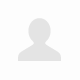
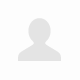
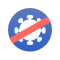
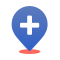
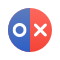
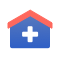

In [88]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

> 다른 사이트 한번 더 적용

In [11]:
# http://korean.visitkorea.or.kr/
from selenium.webdriver.chrome.options import Options

# chrome_options = Options()
# chrome_options.add_argument("--window-size=1920,1080")
# driver = Chrome(chrome_options=chrome_options)
driver = webdriver.Chrome()
driver.get('http://korean.visitkorea.or.kr/')

In [12]:
search_kw = input('키워드 입력')
elem = driver.find_element_by_id('inp_search')

C:\Users\짱남\AppData\Local\Temp/ipykernel_9176/450070786.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem = driver.find_element_by_id('inp_search')


In [13]:
elem.send_keys('바다')

In [ ]:
# selenium 정리 : 태그 => element

# elem = find_element_by_class_name('class')
# elem = find_element_by_id('class')
# elem = find_element_by_xpath('class')
# elem = find_element_by_link_text('class')
# elem = find_element_by_partial_link_text('class')
# elem = find_element_by_name('class')
# elem = find_element_by_lag_name('class')